In [2]:
from os.path import join as pjoin
from os import listdir
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_ind
import seaborn as sns

from evaluate import get_nan_percent, get_performance, tolerant_mean, plot_nan_percent
from analysis.monitor import monitor_train

In [3]:
bookkeeping_path = ('session_info.csv')

mouse_codes = []
dates = []
versions = []
performances = []
session_indices = np.array([], dtype=int)

for mouse_code in listdir('data'):
    mice_path = pjoin('data', mouse_code)

    cur_mouse_code = []
    cur_date = []
    cur_version = []
    cur_performance = []

    for session in listdir(mice_path):
        date_version = '.'.join(session.split('.')[:-1])
        date = date_version.split('-')[0]
        version = date_version.split('-')[1]
        session_path = pjoin(mice_path, session)
        session_data = pd.read_csv(session_path)
        leftP = session_data['leftP']
        choices = session_data['choices']
        if len(choices) < 100:
            continue
        try:
            performance = get_performance(choices=choices, leftP=leftP, version=version)
        except RuntimeError:
            continue
        cur_mouse_code.append(mouse_code)
        cur_date.append(date)
        cur_version.append(version)
        cur_performance.append(performance)
        
    cur_session_indices = rankdata(cur_date).astype(int)
    mouse_codes += cur_mouse_code
    dates += cur_date
    performances += cur_performance
    versions += cur_version
    session_indices = np.concatenate((session_indices, cur_session_indices))

data = pd.DataFrame({'mouse_code': mouse_codes, 
                    'date': dates,
                    'performance': performances,
                    'version': versions,
                    'session_index': session_indices})

data.to_csv(bookkeeping_path, index=False)

## Visual inspection testing our performance measurement

In [4]:
# perf_data = data.sort_values(by='performance', ascending=False)
# perf_data = perf_data[['20' in v for v in perf_data['version']]]

# perf_data_good = perf_data.head(200)
# perf_data_bad = perf_data.tail(200)

# for ind, session in perf_data_good.iterrows():
#     session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
#     session_data = pd.read_csv(session_path)
#     choices = session_data['choices'].to_numpy().flatten()
#     leftP = session_data['leftP'].to_numpy().flatten()
#     trial_indices = session_data['trial_indices'].to_numpy().flatten()
#     rewarded = session_data['rewarded'].to_numpy().flatten()
#     fig, axes = plt.subplots()
#     fig.suptitle('performance: %f' % session['performance'])
#     monitor_train(leftP, axes, trial_indices, choices, rewarded)
#     plt.show()

## Setting The Trial limit for motor_training, training_1, training_2 and data collection

### Motor training limit

<Figure size 432x288 with 0 Axes>

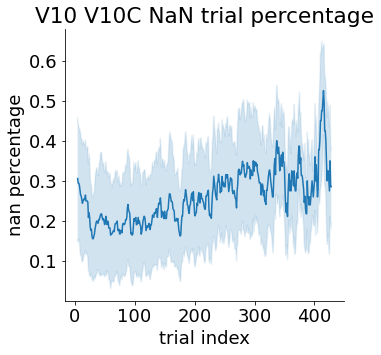

68


In [5]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['10' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices, 'V10 V10C NaN trial percentage')
print(len(choices))

<Figure size 432x288 with 0 Axes>

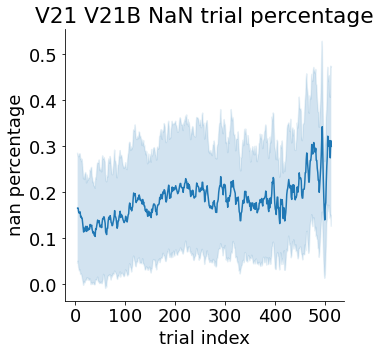

146


In [6]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['21' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices, 'V21 V21B NaN trial percentage')
print(len(choices))

<Figure size 432x288 with 0 Axes>

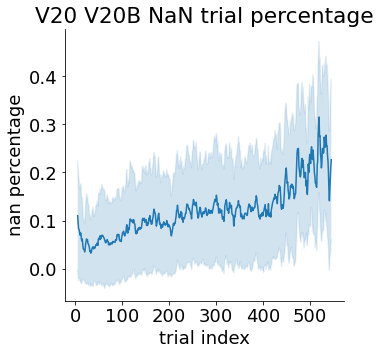

149


In [7]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['20' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices, 'V20 V20B NaN trial percentage')
print(len(choices))

### Determine trianed sessions

In [8]:
data = pd.read_csv('session_info.csv')


<Figure size 432x288 with 0 Axes>

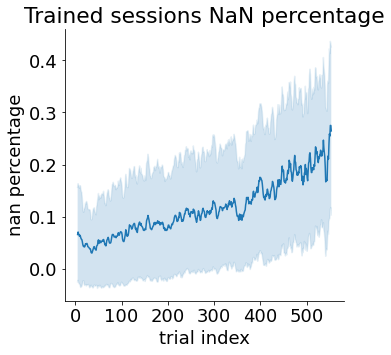

293


In [9]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[data.session_index > 30]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices, 'Trained sessions NaN percentage')
print(len(choices))

## Benchmark motor training with V10 data

22
46


c:\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


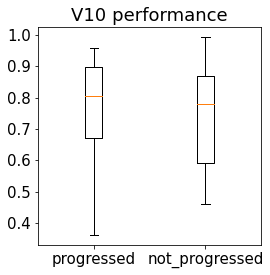

In [10]:
data = pd.read_csv('session_info.csv')
plt.rcParams.update({'font.size': 15})


not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'AKED07']
progressed = ['APPPS1_1', 'JGED01', 'JGED03', 'JGED04',  'JGED08', 'JGED22', 'JGED23', 'JGED24']

v10_not_progressed = data[['10' in v for v in data.version]]
v10_not_progressed = v10_not_progressed[[x in not_progressed for x in v10_not_progressed.mouse_code]]
print(len(v10_not_progressed))

v10_progressed = data[['10' in v for v in data.version]]
v10_progressed = v10_progressed[[x in progressed for x in v10_progressed.mouse_code]]
print(len(v10_progressed))

performance_progressed = []
performance_not_progressed = []

for animal in progressed:
    best = 0
    for ind, session in v10_progressed[v10_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:300]
        leftP = session_data['leftP'].to_numpy().flatten()[:300]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_progressed.append(perf)
    

for animal in not_progressed:
    best = 0
    for ind, session in v10_not_progressed[v10_not_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:300]
        leftP = session_data['leftP'].to_numpy().flatten()[:300]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_not_progressed.append(perf)

data_to_plot = [performance_progressed, performance_not_progressed]

fig, ax = plt.subplots(figsize=(4, 4))
ax.boxplot(data_to_plot)
ax.set_xticklabels(['progressed', 'not_progressed'])
ax.set_title('V10 performance')
plt.savefig('v10 performance.png', dpi=300)

In [11]:
ttest_ind(a=performance_progressed, b=performance_not_progressed)

Ttest_indResult(statistic=0.8741781177433524, pvalue=0.38519114412168476)

48
49


c:\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


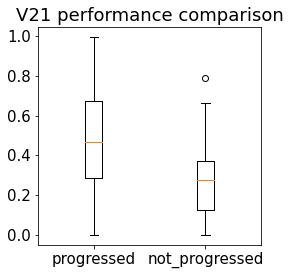

In [12]:
data = pd.read_csv('session_info.csv')
data = data[data['session_index'] > 10]
not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'JGED04', 'AKED07']
progressed = ['APPPS1_1', 'JGED01', 'JGED03', 'JGED08', 'JGED22', 'JGED23', 'JGED24']

v21_not_progressed = data[['21' in v for v in data.version]]
v21_not_progressed = v21_not_progressed[[x in not_progressed for x in v21_not_progressed.mouse_code]]
print(len(v21_not_progressed))

v21_progressed = data[['21' in v for v in data.version]]
v21_progressed = v21_progressed[[x in progressed for x in v21_progressed.mouse_code]]
print(len(v21_progressed))

performance_progressed = []
performance_not_progressed = []

for animal in progressed:
    best = 0
    for ind, session in v21_progressed[v21_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:400]
        leftP = session_data['leftP'].to_numpy().flatten()[:400]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_progressed.append(perf)
    

for animal in not_progressed:
    best = 0
    for ind, session in v21_not_progressed[v21_not_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:400]
        leftP = session_data['leftP'].to_numpy().flatten()[:400]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_not_progressed.append(perf)

data_to_plot = [performance_progressed, performance_not_progressed]

fig, ax = plt.subplots(figsize=(4, 4))
ax.boxplot(data_to_plot)
ax.set_xticklabels(['progressed', 'not_progressed'])
ax.set_title('V21 performance comparison')
plt.savefig('v21 performance.png', dpi=300)

In [13]:
ttest_ind(a=performance_progressed, b=performance_not_progressed)

Ttest_indResult(statistic=4.866856142068254, pvalue=4.50097365009871e-06)

In [18]:
from sklearn.linear_model import LogisticRegression

Xs = performance_progressed + performance_not_progressed
ys = len(performance_progressed) * [1] + len(performance_not_progressed) * [0]

Xs = np.array(Xs).reshape(-1, 1)
ys = np.array(ys).reshape(-1, 1)

lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=1)
lr.fit(X=Xs, y=ys)
lr.predict(Xs)

X_test = np.arange(start=0, stop=1, step=0.001).reshape(-1, 1)
y_test = lr.predict(X_test)
for ind, y in enumerate(y_test):
    if ind > 0  and y != y_test[ind-1]:
        print(ind)

357


c:\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data = pd.read_csv('session_info.csv')
not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'JGED04', 'AKED07']

v21_not_progressed = data[['21' in v for v in data.version]]
v21_not_progressed = v21_not_progressed[[x in not_progressed for x in v21_not_progressed.mouse_code]]

performance_not_progressed = []
    

for animal in not_progressed:
    best = 0
    for ind, session in v21_not_progressed[v21_not_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:400]
        leftP = session_data['leftP'].to_numpy().flatten()[:400]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_not_progressed.append(perf)

In [ ]:
performance_not_progressed_sorted = np.sort(performance_not_progressed)
np.percentile(performance_not_progressed_sorted, 95)

0.63325

### Training 2 cutoff

In [ ]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['20' in v for v in data.version]]
trained_v20 = filtered[data.session_index > 20]
performances = []

for ind, session in trained_v20.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    performances.append(get_performance(session_data['choices'], session_data['leftP'], session['version']))

print(np.mean(performances))

c:\Python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.5926271621448799


## Determination of session difficulty

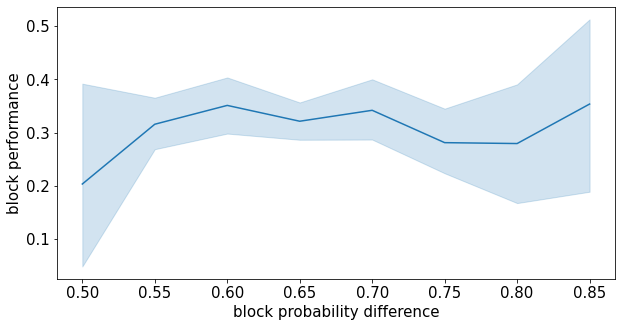

In [ ]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[data.session_index > 30]

not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'JGED04', 'AKED07']


perf = []
diff = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    session_data = session_data.head(450)

    leftP = session_data['leftP']
    rightP = session_data['rightP']
    choices = session_data['choices']

    if leftP[0] == rightP[0]:
        continue

    if session.mouse_code in not_progressed:
        continue

    switches = [0]

    for ind, p in enumerate(leftP):
        if ind > 0 and p != leftP[ind - 1]:
            switches.append(ind)
    
    switches.append(len(leftP))

    for ind, switch in enumerate(switches):
        if ind + 1 < len(switches):
            leftP_block = leftP[switch: switches[ind + 1]]
            choices_block = choices[switch: switches[ind + 1]]
            rightP_block = rightP[switch: switches[ind + 1]]

            block_diff = np.abs(leftP_block[switch] - rightP_block[switch])
            if np.abs(0.65 - block_diff) < 0.01:
                block_diff = 0.65
            diff.append(block_diff)
            leftP_block = leftP_block.reset_index()['leftP']
            perf.append(get_performance(choices_block, leftP_block, session.version))

fig, axes = plt.subplots(figsize=(10, 5))
sns.lineplot(x=diff, y=perf, ax=axes)
axes.set_ylabel('block performance')
axes.set_xlabel('block probability difference')
fig.savefig('difficulty.png')

In [16]:
from numpy.random import RandomState

seed = 1
rs = RandomState(seed=seed)
print(rs.uniform(low=0.6, high=0.8))
print(rs.uniform(low=0.6, high=0.8))
print(rs.uniform(low=0.6, high=0.8))

0.6834044009405148
0.7440648986884316
0.600022874963469
